In [1]:
from linares_plot import *

In [2]:
### Recording, se genera txt

In [148]:
file ='rester.txt'
file ='recordeing4.txt'


In [149]:
data = pd.read_csv(file, delimiter=',', header=None)

In [150]:
### 0,0 es arriba a la izquierda!!

In [151]:
### Remove NANs

In [152]:
print(len(data))
data.iloc[:,2].unique()

441


array(['statuscode:200', nan], dtype=object)

In [153]:
df_ = data[data.iloc[:,2]=='statuscode:200']
df_ = df_.reset_index()

In [154]:
df_.head(5)

index                      0              1               2  \
0      0  {"category":"tracker"  request:"get"  statuscode:200   
1      1  {"category":"tracker"  request:"get"  statuscode:200   
2      2  {"category":"tracker"  request:"get"  statuscode:200   
3      3  {"category":"tracker"  request:"get"  statuscode:200   
4      4  {"category":"tracker"  request:"get"  statuscode:200   

                                      3            4          5  \
0  values:{"frame":{"avg":{"x":556.4053  y:534.5923}  fix:false   
1  values:{"frame":{"avg":{"x":558.2166  y:535.7863}  fix:false   
2  values:{"frame":{"avg":{"x":556.6574  y:535.2275}  fix:false   
3  values:{"frame":{"avg":{"x":558.9724  y:530.6328}  fix:false   
4  values:{"frame":{"avg":{"x":525.1778  y:510.1535}  fix:false   

                              6            7                    8  ...  \
0  lefteye:{"avg":{"x":578.0540  y:516.6655}  pcenter:{"x":0.4361  ...   
1  lefteye:{"avg":{"x":580.4384  y:525.0395}  pcenter:{"x":0.4361  ...   
2  lefteye:{"avg":{"x":571.3051  y:509.8150}  pcenter:{"x":0.4360  ...   
3  lefteye:{"avg":{"x":568.0631  y:512.5652}  pcenter:{"x":0.4363  ...   
4       lefteye:{"avg":{"x":0.0       y:0.0}  pcenter:{"x":0.4368  ...   

                              15           16                   17         18  \
0  righteye:{"avg":{"x":539.9892  y:567.5903}  pcenter:{"x":0.6250  y:0.3843}   
1  righteye:{"avg":{"x":539.7655  y:553.5922}  pcenter:{"x":0.6250  y:0.3841}   
2  righteye:{"avg":{"x":533.4262  y:556.3060}  pcenter:{"x":0.6251  y:0.3841}   
3  righteye:{"avg":{"x":531.3231  y:502.3960}  pcenter:{"x":0.6253  y:0.3840}   
4  righteye:{"avg":{"x":525.1778  y:510.1535}  pcenter:{"x":0.6255  y:0.3843}   

              19                 20            21       22              23  \
0  psize:15.6129  raw:{"x":529.9972  y:584.8425}}  state:7  time:271019173   
1   psize:15.930  raw:{"x":539.1566  y:511.8857}}  state:7  time:271019206   
2  psize:15.8245  raw:{"x":508.6069  y:567.1720}}  state:7  time:271019240   
3  psize:15.8489  raw:{"x":531.3231  y:502.3960}}  state:7  time:271019273   
4  psize:15.8764  raw:{"x":525.1778  y:510.1535}}  state:7  time:271019306   

                                       24  
0  timestamp:"2022-03-03 15:20:35.365"}}}  
1  timestamp:"2022-03-03 15:20:35.398"}}}  
2  timestamp:"2022-03-03 15:20:35.432"}}}  
3  timestamp:"2022-03-03 15:20:35.465"}}}  
4  timestamp:"2022-03-03 15:20:35.498"}}}  

[5 rows x 26 columns]

4,5 --> xy average  
7,8 --> xy left eye  
9,10 --> pcenter left eye  
11 --> psize left  
16,17 --> xy right eye  
18,19 --> pcenter right eye  
20 --> psize left  


In [155]:
pos_x = []
pos_y = []
time_ = []
for i in range(len(df_)):
    x = float(df_.iloc[:,4][i].split(':')[-1])
    pos_x.append(x)
    y = float(df_.iloc[:,5][i].split(':')[1].split('}')[0])
    pos_y.append(y)
    time = df_.iloc[:,-1][i].split(' ')[-1].split('}')[0].split('"')[0]
    time_.append(time)

In [156]:
df = pd.DataFrame({'x':pos_x, 'y':pos_y, 'time': time_})
df.head()

time         x         y
0  15:20:35.365  556.4053  534.5923
1  15:20:35.398  558.2166  535.7863
2  15:20:35.432  556.6574  535.2275
3  15:20:35.465  558.9724  530.6328
4  15:20:35.498  525.1778  510.1535

In [157]:
df = df.loc[df['x']!=0]
df = df.loc[df['y']!=0]

In [158]:
len(df)

398

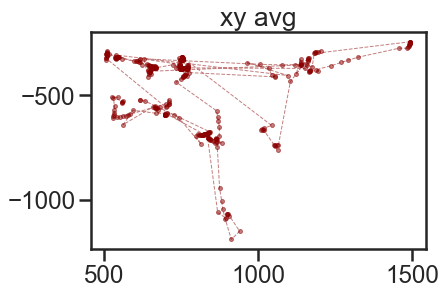

In [159]:
plt.title('xy avg')
plt.plot(df.x, 1-df.y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

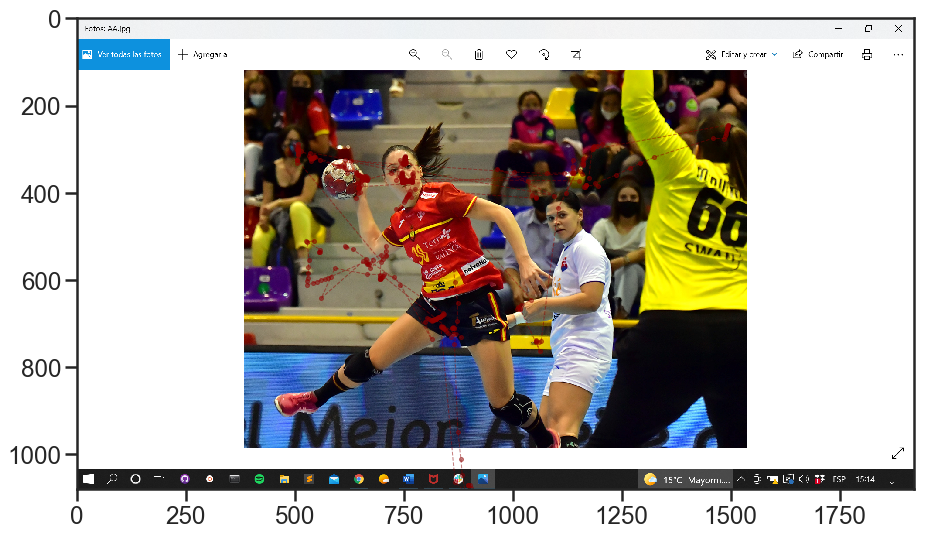

In [160]:
import matplotlib.image as mpimg
img = mpimg.imread('seen3.png')
plt.figure(figsize=(15,10))
imgplot = plt.imshow(img)
plt.ylim(1080,0)
plt.xlim(0,1920)
plt.plot(df.x, df.y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

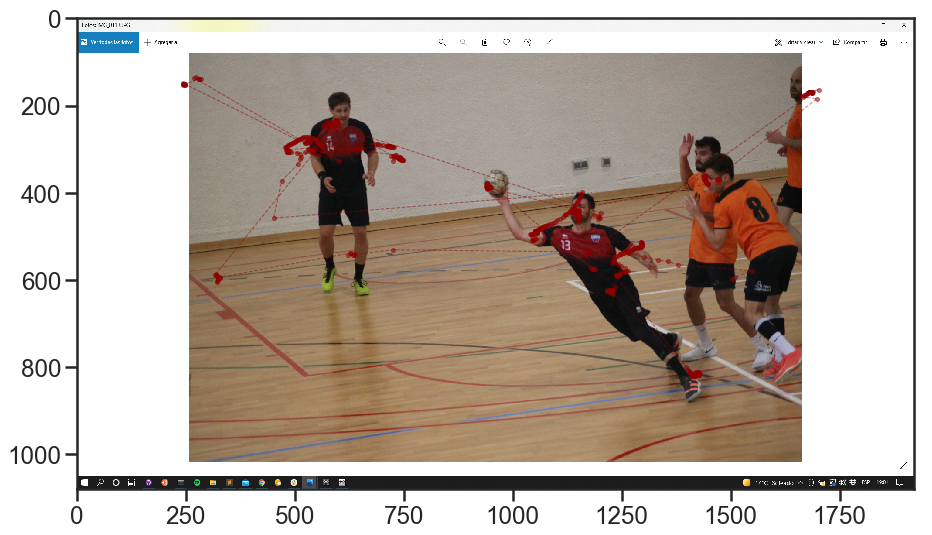

In [86]:
import matplotlib.image as mpimg
img = mpimg.imread('seen2.png')
plt.figure(figsize=(15,10))
imgplot = plt.imshow(img)
plt.ylim(1080,0)
plt.xlim(0,1920)
plt.plot(df.x, df.y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

In [87]:
### Heatmap

Screen resolution = 1920 x 1080  
https://github.com/TobiasRoeddiger/GazePointHeatMap  

In [115]:
import os
import argparse
import csv
import numpy
import matplotlib
from matplotlib import pyplot, image

def draw_display(dispsize, imagefile=None):
    """Returns a matplotlib.pyplot Figure and its axes, with a size of
    dispsize, a black background colour, and optionally with an image drawn
    onto it

    arguments

    dispsize		-	tuple or list indicating the size of the display,
                    e.g. (1024,768)

    keyword arguments

    imagefile		-	full path to an image file over which the heatmap
                    is to be laid, or None for no image; NOTE: the image
                    may be smaller than the display size, the function
                    assumes that the image was presented at the centre of
                    the display (default = None)

    returns
    fig, ax		-	matplotlib.pyplot Figure and its axes: field of zeros
                    with a size of dispsize, and an image drawn onto it
                    if an imagefile was passed
    """

    # construct screen (black background)
    screen = numpy.zeros((dispsize[1], dispsize[0], 4), dtype='float32')
    # if an image location has been passed, draw the image
    if imagefile != None:
        # check if the path to the image exists
        if not os.path.isfile(imagefile):
            raise Exception("ERROR in draw_display: imagefile not found at '%s'" % imagefile)
        # load image
        img = mpimg.imread(imagefile)
        #img = image.imread(imagefile)

        # width and height of the image
        w, h = len(img[0]), len(img)
        # x and y position of the image on the display
        x = dispsize[0] / 2 - w / 2
        y = dispsize[1] / 2 - h / 2
        # draw the image on the screen
        screen[int(y):int(y) + h, int(x):int(x) + w, :] += img
    # dots per inch
    dpi = 100.0
    # determine the figure size in inches
    figsize = (dispsize[0] / dpi, dispsize[1] / dpi)
    # create a figure
    fig = pyplot.figure(figsize=figsize, dpi=dpi, frameon=False)
    ax = pyplot.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)
    # plot display
    ax.axis([0, dispsize[0], 0, dispsize[1]])
    ax.imshow(screen)  # , origin='upper')

    return fig, ax

def gaussian(x, sx, y=None, sy=None):
    """Returns an array of numpy arrays (a matrix) containing values between
    1 and 0 in a 2D Gaussian distribution

    arguments
    x		-- width in pixels
    sx		-- width standard deviation

    keyword argments
    y		-- height in pixels (default = x)
    sy		-- height standard deviation (default = sx)
    """

    # square Gaussian if only x values are passed
    if y == None:
        y = x
    if sy == None:
        sy = sx
    # centers
    xo = x / 2
    yo = y / 2
    # matrix of zeros
    M = numpy.zeros([y, x], dtype=float)
    # gaussian matrix
    for i in range(x):
        for j in range(y):
            M[j, i] = numpy.exp(
                -1.0 * (((float(i) - xo) ** 2 / (2 * sx * sx)) + ((float(j) - yo) ** 2 / (2 * sy * sy))))

    return M

def draw_heatmap(df_gazepoints, dispsize, imagefile=None, alpha=0.5, savefilename=None, 
                 gaussianwh=200, plot_xy=False, gaussiansd=None):
    """Draws a heatmap of the provided fixations, optionally drawn over an
    image, and optionally allocating more weight to fixations with a higher
    duration.

    arguments

    gazepoints		-	a list of gazepoint tuples (x, y)
    
    dispsize		-	tuple or list indicating the size of the display,
                    e.g. (1024,768)

    keyword arguments

    imagefile		-	full path to an image file over which the heatmap
                    is to be laid, or None for no image; NOTE: the image
                    may be smaller than the display size, the function
                    assumes that the image was presented at the centre of
                    the display (default = None)
    alpha		-	float between 0 and 1, indicating the transparancy of
                    the heatmap, where 0 is completely transparant and 1
                    is completely untransparant (default = 0.5)
    savefilename	-	full path to the file in which the heatmap should be
                    saved, or None to not save the file (default = None)

    returns

    fig			-	a matplotlib.pyplot Figure instance, containing the
                    heatmap
    """

    # IMAGE
    fig, ax = draw_display(dispsize, imagefile=imagefile)

    # HEATMAP
    # Gaussian
    gwh = gaussianwh
    gsdwh = gwh / 6 if (gaussiansd is None) else gaussiansd
    #
    gaus = gaussian(gwh, gsdwh)
    # matrix of zeroes
    strt = gwh / 2
    heatmapsize = int(dispsize[1] + 2 * strt), int(dispsize[0] + 2 * strt)
    heatmap = numpy.zeros(heatmapsize, dtype=float)
    #print(np.shape(heatmap))
    
    gazepoints = [(df_gazepoints.X.iloc[i], df_gazepoints.Y.iloc[i]) for i in range(len(df_gazepoints))]
        
    # create heatmap
    for i in range(0, len(gazepoints)):
        # get x and y coordinates
        x =  gazepoints[i][0] 
        #print(x)
        y =  gazepoints[i][1] 
        # add Gaussian to the current heatmap
        #heatmap[y:y + gwh, x:x + gwh] += gaus * 0.5
        #heatmap[y:y+gwh, x:x+gwh] += gaus * 0.25
        if (x-gwh>0) and (x+gwh<dispsize[0]) and (y-gwh>0) and (y+gwh<dispsize[1]):
            #print('a')
            heatmap[y-int(gwh/2):y+int(gwh/2), x-int(gwh/2):x+int(gwh/2) ] += gaus * 1
       

    ##
    # resize heatmap
    #heatmap = heatmap[strt:dispsize[1] + strt, strt:dispsize[0] + strt]
    # remove zeros
    lowbound = numpy.mean(heatmap[heatmap > 0])
    heatmap[heatmap < lowbound] = numpy.NaN
    # draw heatmap on top of image
    ax.imshow(heatmap, cmap='jet', alpha=alpha)
    if plot_xy ==True:
        plt.plot(df_gazepoints.X, df_gazepoints.Y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

    # FINISH PLOT
    # invert the y axis, as (0,0) is top left on a display
    ax.invert_yaxis()
    # save the figure if a file name was provided
    if savefilename != None:
        fig.savefig(savefilename)

    #return heatmap


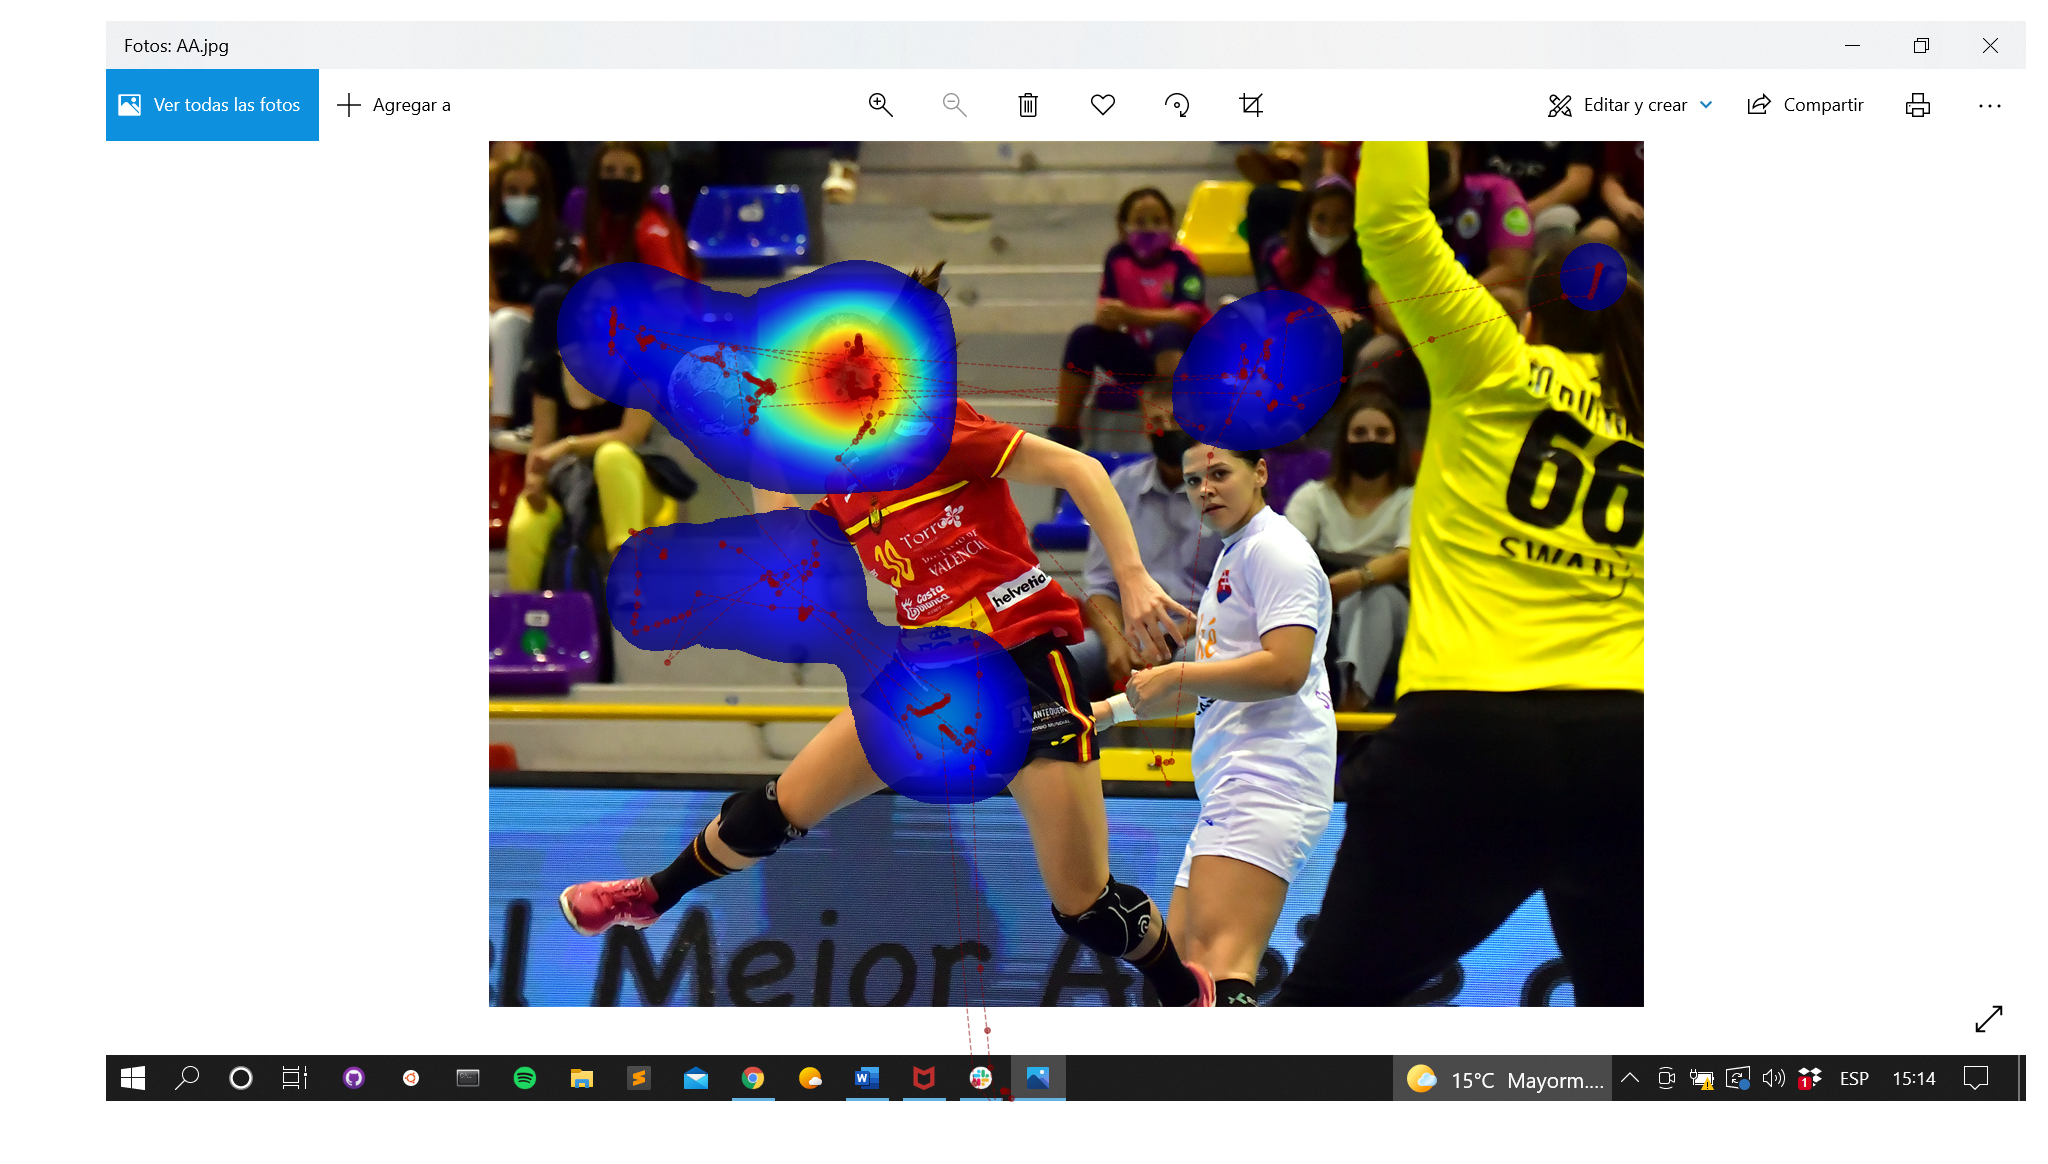

In [167]:
df['X'] = df['x'].astype(int)
df['Y'] = df['y'].astype(int)

# df_csv = df[['x_int', 'y_int']]
# df_csv.columns=['X', 'Y']

#input_path = 'file_positions.csv'
display_width = 1920
display_height = 1080

#display_width = 1280
#display_height = 720

alpha = 0.8
#output_name = 'output_img2.png'
background_image = 'seen3.png'
ngaussian = 200 #200 #200
sd = 50

draw_heatmap(df, (display_width, display_height), alpha=alpha, savefilename=None, plot_xy=True, 
             imagefile=background_image, gaussianwh=ngaussian, gaussiansd=sd)

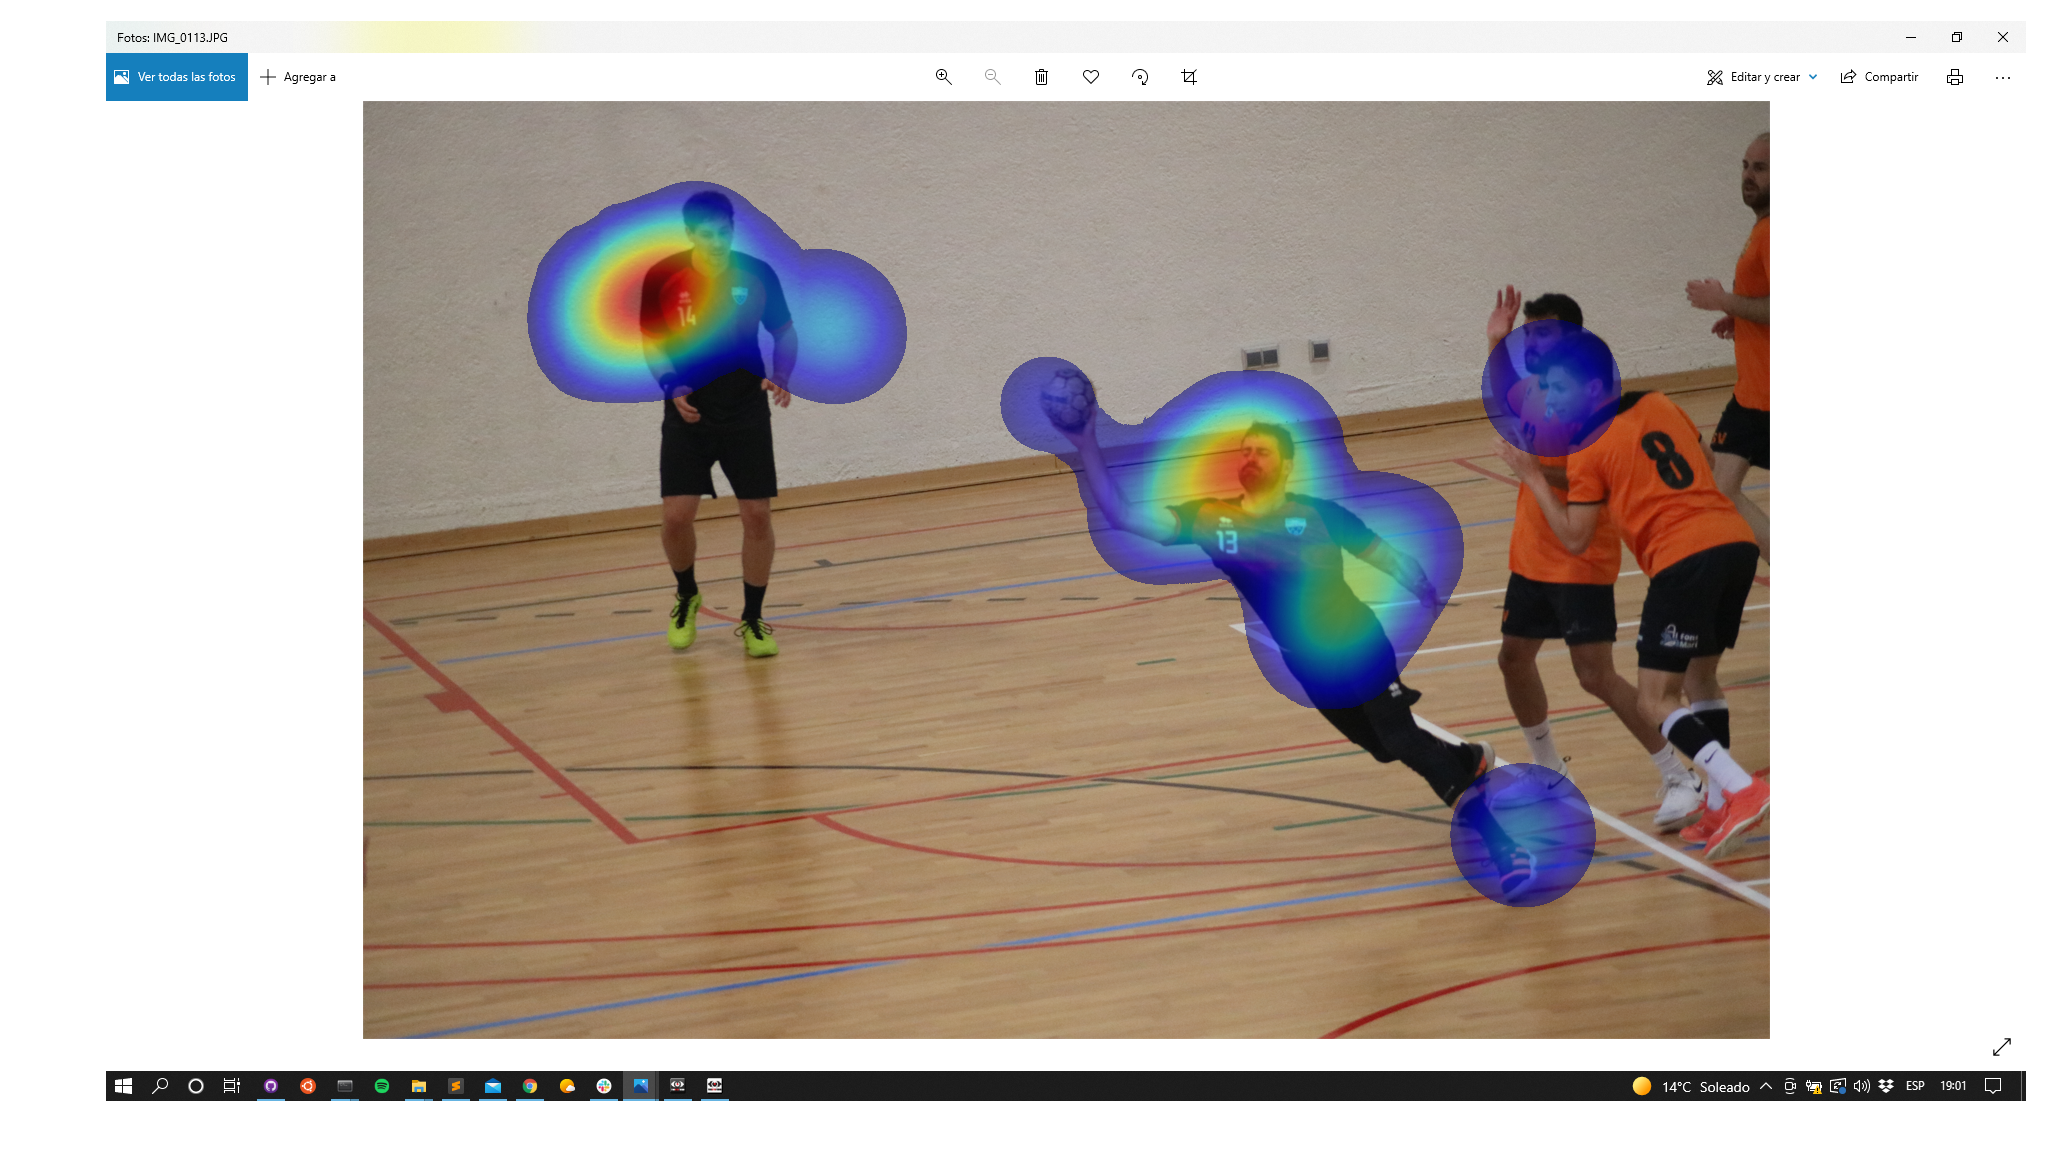

In [147]:
df['X'] = df['x'].astype(int)
df['Y'] = df['y'].astype(int)

# df_csv = df[['x_int', 'y_int']]
# df_csv.columns=['X', 'Y']

#input_path = 'file_positions.csv'
display_width = 1920
display_height = 1080

#display_width = 1280
#display_height = 720

alpha = 0.5
#output_name = 'output_img2.png'
background_image = 'seen2.png'
ngaussian = 200 #200 #200
sd = 50


draw_heatmap(df, (display_width, display_height), alpha=alpha, savefilename=None, plot_xy=False, 
             imagefile=background_image, gaussianwh=ngaussian, gaussiansd=sd)


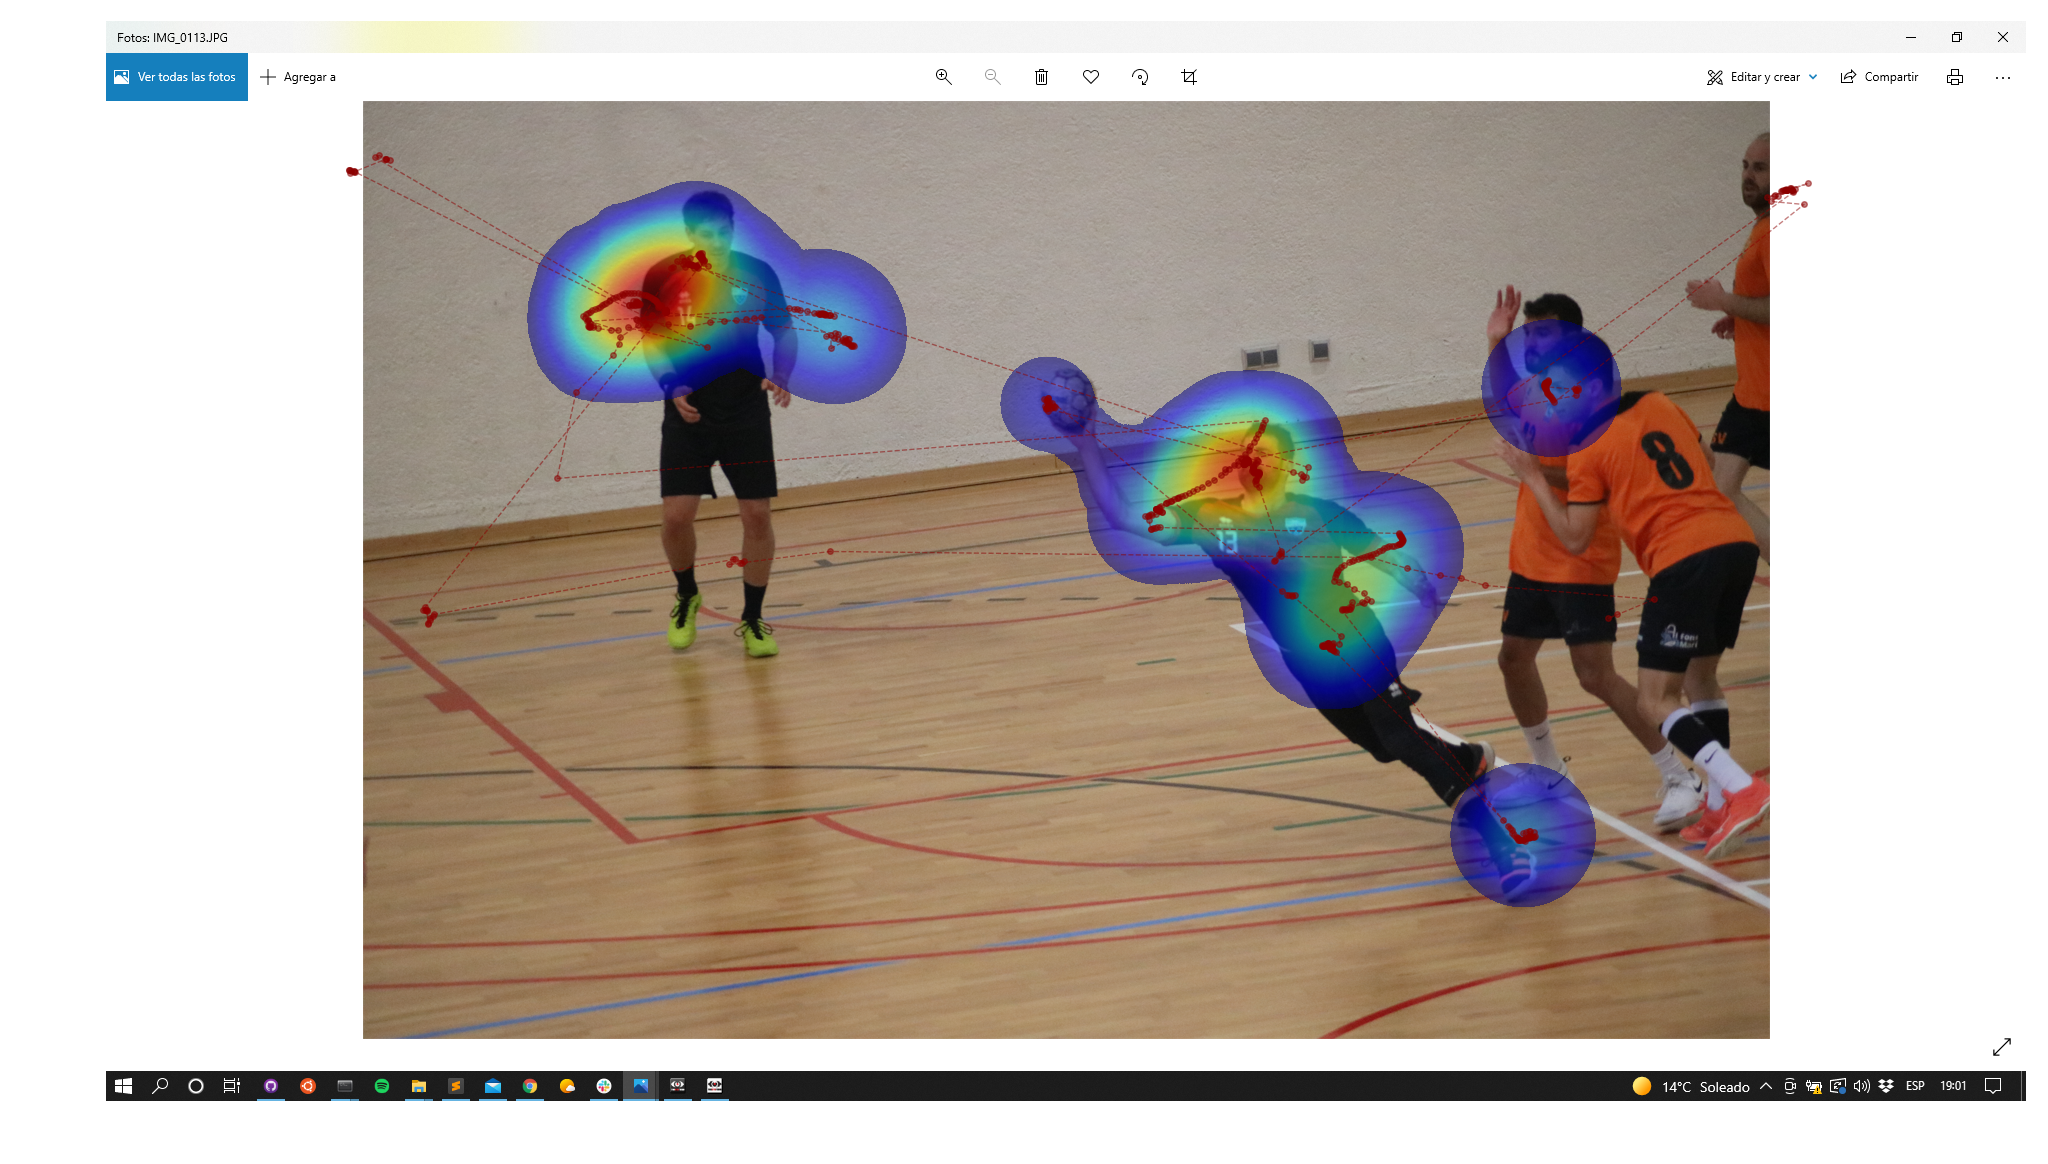

In [93]:
draw_heatmap(df, (display_width, display_height), alpha=alpha, savefilename=None, plot_xy=True, 
             imagefile=background_image, gaussianwh=ngaussian, gaussiansd=sd)